<a href="https://colab.research.google.com/github/MORO-66t/0x00-Fix_My_Code_Challenge/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt


In [2]:

# Load IMDb dataset
num_words = 10000  # Keep only top 10,000 words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Pad sequences to ensure uniform input size
max_length = 200  # Truncate or pad sequences to 200 words
x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

In [4]:
# Build RNN model
model = Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=max_length),
    SimpleRNN(128, return_sequences=False),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [5]:

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



In [6]:
# Train model
epochs = 5
batch_size = 64
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 84s 201ms/step - accuracy: 0.5037 - loss: 0.7094 - val_accuracy: 0.4950 - val_loss: 0.6967
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 76s 195ms/step - accuracy: 0.4969 - loss: 0.7111 - val_accuracy: 0.5000 - val_loss: 0.6936
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 83s 196ms/step - accuracy: 0.4998 - loss: 0.7010 - val_accuracy: 0.5000 - val_loss: 0.6936
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 77s 197ms/step - accuracy: 0.4997 - loss: 0.6966 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 80s 193ms/step - accuracy: 0.4959 - loss: 0.6946 - val_accuracy: 0.5000 - val_loss: 0.6932


In [7]:
# Evaluate model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')


782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.5073 - loss: 0.6930
Test Accuracy: 0.5000


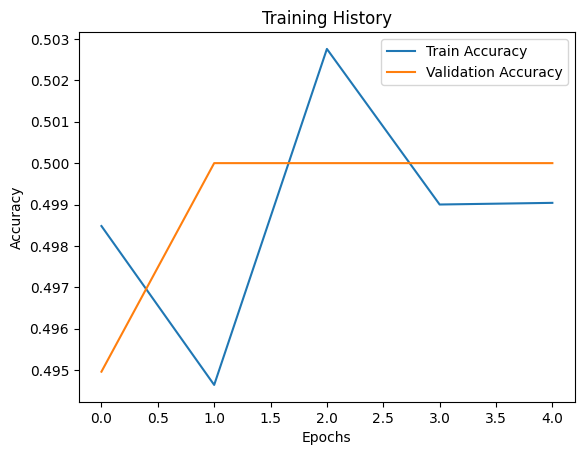

In [8]:

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training History')
plt.show()
